In [1]:
pip install pyodbc sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sqlalchemy import create_engine

server = "localhost"       
database = "QAECECRM_DA_MayFT1-2025-8-12-18-9"   
driver = "ODBC Driver 17 for SQL Server"  

connection_string = f"mssql+pyodbc://@{server}/{database}?driver={driver}"
engine = create_engine(connection_string)

In [8]:
# Exploring the Data
import pandas as pd

query1 = "SELECT * from dbo.BlueCard;"  
query2 = "Select * from dbo.Lead"
query3 = "Select * from dbo.PayrollPayment"
query4 = "Select * from dbo.BlueCardArtist"
query5 = "Select * from dbo.AgentPayrollLog"
bluecard = pd.read_sql(query1, engine)
agent_payroll= pd.read_sql(query5, engine)


bluecard.info()
agent_payroll.info()

# Quick look at missing values
print(bluecard.isnull().sum())
print(agent_payroll.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200008 entries, 0 to 200007
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BlueCardId              200008 non-null  int64         
 1   AgentId                 200008 non-null  int64         
 2   PresenterId             73461 non-null   float64       
 3   AccountName             192112 non-null  object        
 4   OrganizationName        67513 non-null   object        
 5   EventTypeId             198696 non-null  float64       
 6   LeadId                  28398 non-null   float64       
 7   VenueId                 19107 non-null   float64       
 8   VenueName               67475 non-null   object        
 9   VenuePhysicalAddress1   67102 non-null   object        
 10  VenuePhysicalAddress2   67102 non-null   object        
 11  VenuePhysicalCity       67475 non-null   object        
 12  VenuePhysicalStateId    66170 

Data shape: (174, 5)
   TotalLeads  TotalBlueCards    Revenue  ProfitMargin  RevenuePerEvent
0          25              25   10800.00          0.52           432.00
1         637             637  106384.83          0.36           167.01
2         548             548  486667.01          0.60           888.08
3         364             364   19163.60          1.03            52.65
4         382             382  475594.98          0.40          1245.01

Correlation Matrix:
                 TotalLeads  TotalBlueCards   Revenue  ProfitMargin  \
TotalLeads         1.000000        1.000000  0.800846      0.007145   
TotalBlueCards     1.000000        1.000000  0.800846      0.007145   
Revenue            0.800846        0.800846  1.000000      0.018960   
ProfitMargin       0.007145        0.007145  0.018960      1.000000   
RevenuePerEvent   -0.070181       -0.070181  0.008352      0.064276   

                 RevenuePerEvent  
TotalLeads             -0.070181  
TotalBlueCards         -0.070

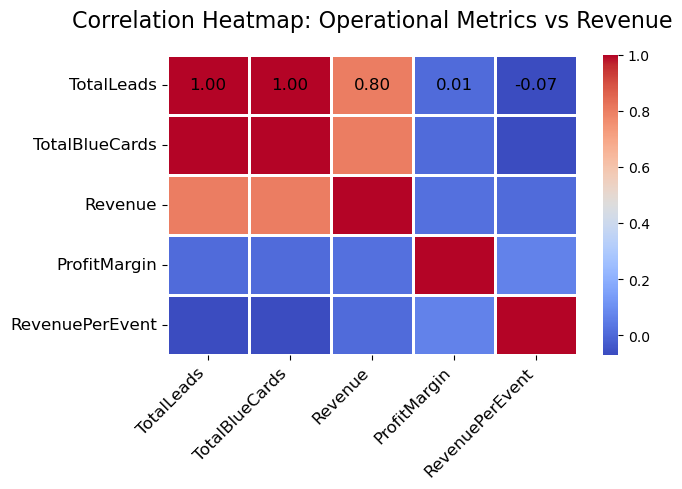

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Data shape:", merged_df.shape)
print(merged_df.head())

# =======================
# STEP 2 — Select only relevant numeric columns
# =======================
metrics = ['TotalLeads', 'TotalBlueCards', 'TotalGross', 'TotalNet', 
           'AvgCommission', 'Revenue', 'ProfitMargin', 'RevenuePerEvent']

# Keep only existing numeric columns
numeric_df = merged_df[[col for col in metrics if col in merged_df.columns]]

# Drop rows with missing or constant values
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]
numeric_df = numeric_df[(numeric_df.T != 0).any()]

# =======================
# STEP 3 — Compute Correlation Matrix
# =======================
corr_matrix = numeric_df.corr(method='pearson')
print("\nCorrelation Matrix:")
print(corr_matrix)

# =======================
# STEP 4 — Visualize Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make a copy to ensure matrix is numeric
corr_plot = corr_matrix.copy()

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(
    corr_plot,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=False,
    linewidths=1,
    linecolor='white',
    cbar=True,
    annot_kws={"size": 12, "color": "black"}
)

# Beautify labels
ax.set_title("Correlation Heatmap: Operational Metrics vs Revenue", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

In [17]:
merged_df = merged_df[['TotalLeads','TotalBlueCards','Revenue','ProfitMargin','RevenuePerEvent']]


In [19]:
merged_df.to_csv("Cleaned_OperationalMetrics.csv", index=False)
print("✅ Cleaned file exported successfully! Rows:", len(merged_df))

✅ Cleaned file exported successfully! Rows: 174
